# **Business case : Yulu**


---
# **About Yulu :**
Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution
through a user-friendly mobile app to enable shared, solo and sustainable commuting.
Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and
convenient!
Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they
want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

# **Problem Statement:**

The company wants to know:
- Which variables are significant in predicting the demand for shared electric cycles in the Indian market?
- How well those variables describe the electric cycle demands

# **Data Set :**
Dataset Link: yulu_data.csv (https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089)

- **datetime**: datetime
- **season**: season (1: spring, 2: summer, 3: fall, 4: winter)
-** holiday**: whether day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- **workingday**: if day is neither weekend nor holiday is 1, otherwise is 0.
- **weather**:
1: Clear, Few clouds, partly cloudy, partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- **temp**: temperature in Celsius
- **atemp**: feeling temperature in Celsius
- **humidity**: humidity
- **windspeed**: wind speed
- **casual**: count of casual users
- **registered**: count of registered users
- **count**: count of total rental bikes including both casual and registered

# **Exploratory Data Analysis (EDA)**



In [ ]:
#import the required libraries for data analysis.
#basic data analysis checking the structure, characteristics.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import binom
from scipy.stats import norm
import scipy.stats as spy
from scipy.stats import f_oneway




In [ ]:
#downloading the dataset
!gdown https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089
To: /content/bike_sharing.csv?1642089089
100% 648k/648k [00:00<00:00, 8.58MB/s]


In [ ]:
data = pd.read_csv('bike_sharing.csv?1642089089')
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
#No. of rows and columns in the data
data.shape

(10886, 12)

In [ ]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
data.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


In [ ]:
type(data)

pandas.core.frame.DataFrame

In [ ]:
#Info extraction of all columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
#statistical information of data
data.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [ ]:
print(data.dtypes)

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object


In [ ]:
print(data.describe())

             season       holiday    workingday       weather         temp  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.00000   
mean       2.506614      0.028569      0.680875      1.418427     20.23086   
std        1.116174      0.166599      0.466159      0.633839      7.79159   
min        1.000000      0.000000      0.000000      1.000000      0.82000   
25%        2.000000      0.000000      0.000000      1.000000     13.94000   
50%        3.000000      0.000000      1.000000      1.000000     20.50000   
75%        4.000000      0.000000      1.000000      2.000000     26.24000   
max        4.000000      1.000000      1.000000      4.000000     41.00000   

              atemp      humidity     windspeed        casual    registered  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.000000   
mean      23.655084     61.886460     12.799395     36.021955    155.552177   
std        8.474601     19.245033      8.164537     49.96047

**Observations:**
- Dataset Dimensions: The dataset comprises 10886 rows and 12 columns.

- Data Type Consistency: All attributes exhibit appropriate data types.

- Missing Values: The dataset is complete with no missing values.

- Statistical Summary: Detailed summary statistics are available for the numerical attributes.

# **Non-Graphical-Analysis**

In [ ]:
print(data['season'].unique())

[1 2 3 4]


In [ ]:
print(data['holiday'].unique())

[0 1]


In [ ]:
print(data['workingday'].unique())

[0 1]


In [ ]:
print(data['weather'].unique())

[1 2 3 4]


In [ ]:
data.nunique()


datetime      10886
season            4
holiday           2
workingday        2
weather           4
temp             49
atemp            60
humidity         89
windspeed        28
casual          309
registered      731
count           822
dtype: int64

In [ ]:
data['weather'].value_counts()

weather
1    7192
2    2834
3     859
4       1
Name: count, dtype: int64

In [ ]:
data['workingday'].value_counts()

workingday
1    7412
0    3474
Name: count, dtype: int64

In [ ]:
data['weather'].value_counts()

weather
1    7192
2    2834
3     859
4       1
Name: count, dtype: int64

**Observations**


---


- **data['season'].unique() :** Unique values present in the 'season' column of your dataset. In this case, the output [1 2 3 4] indicates that the 'season' column contains four distinct values corresponding to the four seasons: spring, summer, fall, and winter.

- **data['holiday'].unique() :**Unique values in the 'holiday' column are [0, 1], indicating whether a day is a holiday (1) or not (0).

- **data['workingday'].unique() :**unique values: 1 for working days and 0 for non-working days.

- **data['weather'].unique() :**Unique values reveals unique weather categories represented by integers:

  1: Clear, few clouds, partly cloudy

  2: Mist, cloudy

  3: Light rain, snow, thunderstorm

  4: Heavy rain, ice pellets, thunderstorm, snow, fog


- **data.nunique() :** Calculates the number of unique values in each column of the dataset data, indicating the diversity of values across different attributes.

- **data['weather'].value_counts() :** counts the occurrences of each unique value in the 'weather' column

- **data['workingday'].value_counts() :** counts the occurrences of each unique value in the 'workingday' column we can see there are 7412 workingdays.
-** data['weather'].value_counts() :**output shows the distribution of weather categories:

       Weather category 1 appears 7192 times.
       Weather category 2 appears 2834 times.
       Weather category 3 appears 859 times.
       Weather category 4 appears only once in the dataset.

# **Univariate**

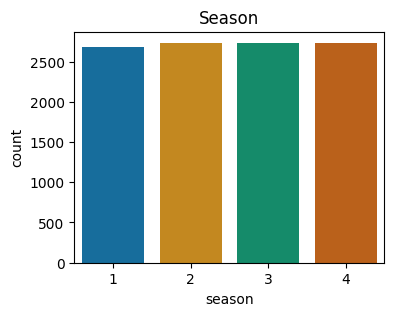

In [ ]:
# plot for season
plt.figure(figsize=(4, 3))
sns.countplot(x='season', hue='season', data=data, palette='colorblind', legend=False)
plt.title('Season')
plt.show()

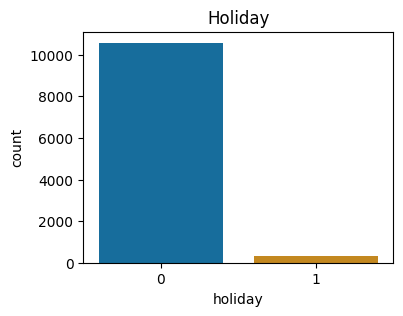

In [ ]:
# plot for holiday
plt.figure(figsize=(4, 3))
sns.countplot(x='holiday', hue='holiday', data=data, palette='colorblind', legend=False)
plt.title('Holiday')
plt.show()

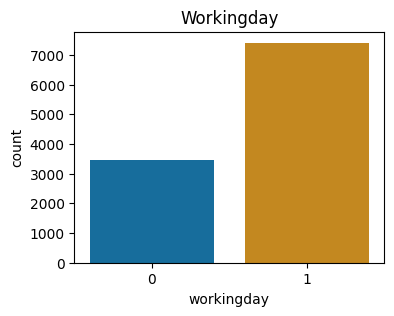

In [ ]:
# Plot for Workingday
plt.figure(figsize=(4, 3))
sns.countplot(x='workingday', hue='workingday', data=data, palette='colorblind', legend=False)
plt.title('Workingday')
plt.show()

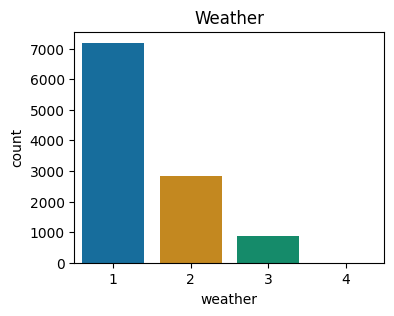

In [ ]:
# plot for weather
plt.figure(figsize=(4, 3))
sns.countplot(x='weather', hue='weather', data=data, palette='colorblind', legend=False)
plt.title('Weather')
plt.show()

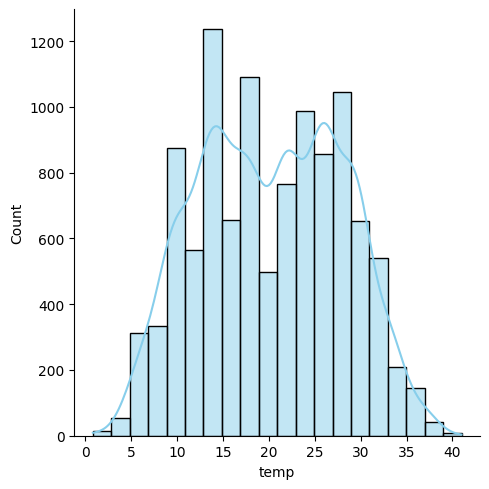

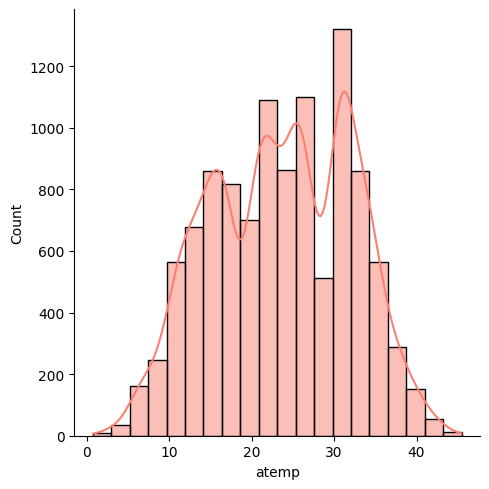

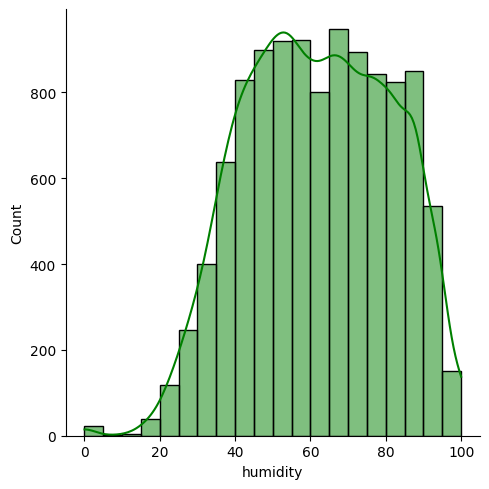

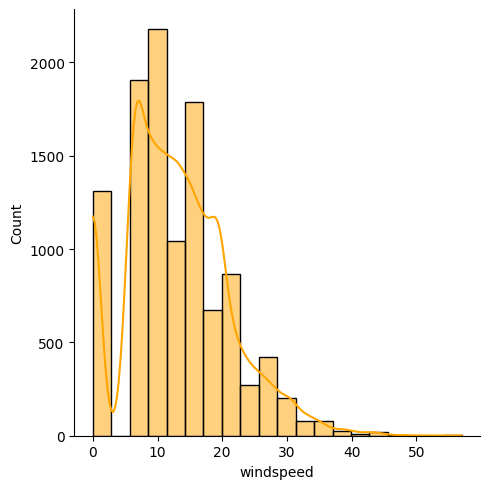

In [ ]:
#Distribution plots of all continuous variables:
sns.displot(data['temp'], kde=True, color='skyblue', bins=20)
sns.displot(data['atemp'], kde=True, color='salmon', bins=20)
sns.displot(data['humidity'], kde=True, color='green', bins=20)
sns.displot(data['windspeed'], kde=True, color='orange', bins=20)
plt.show()

**Observations :**

**Distribution plots of all continuous variables:**
- Temperature and 'feels like' temperature have similar distributions, with the majority of values ranging from 10°C to 30°C.
- Humidity displays a bimodal distribution, peaking around 40% and 80%.
- The distribution of windspeed is skewed towards higher values, suggesting that most days experience low windspeeds but occasional higher winds.

**Season :**
* The distribution of observations across different seasons is relatively uniform.
* Each season (1: Spring, 2: Summer, 3: Fall, 4: Winter) has a comparable number of occurrences in the dataset.

**Holiday :**
* Most observations correspond to non-holidays, as indicated by the higher count in the '0' category.
* Holidays are less frequent compared to non-holidays, indicating that the dataset predominantly consists of regular days.

**Workinday :**
- More observations occur on working days than on non-working days.
- The count of observations is notably higher on working days (1) than on non-working days (0), suggesting a preference for Yulu bikes during weekdays.

**Weather :**
- The majority of observations are associated with clear weather conditions (category 1), followed by partly cloudy conditions (category 2), and then cloudy or misty weather (category 3).
- Severe weather conditions like light rain, heavy rain, or snowfall (category 4) occur the least, suggesting that such weather conditions are less favorable for bike rentals.

# **Bivariate Analysis:**

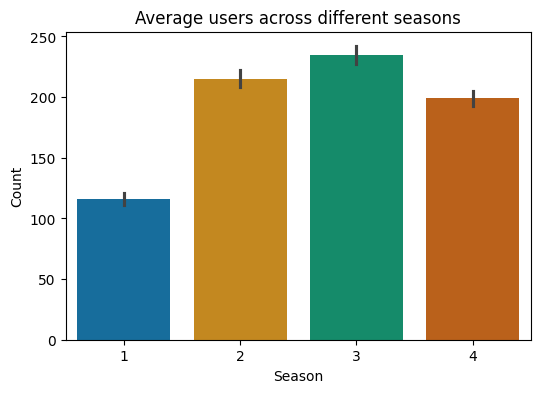

In [ ]:
#Relation between season and count
plt.figure(figsize=(6, 4))
sns.barplot(x='season', y='count', hue='season', data=data, palette='colorblind', legend=False)
plt.title('Average users across different seasons')
plt.xlabel('Season')
plt.ylabel('Count')
plt.show()

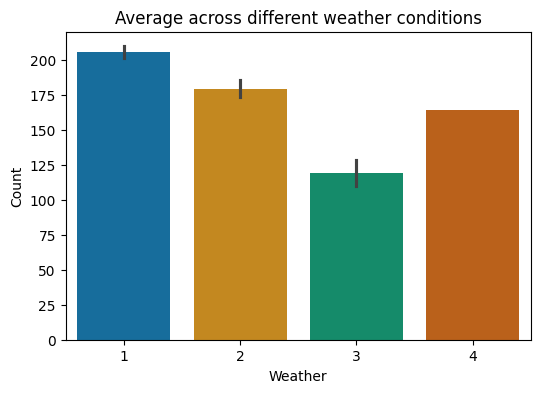

In [ ]:
#Relation between weather and count
plt.figure(figsize=(6,4))
sns.barplot(x='weather', y='count', hue='weather', data=data, palette='colorblind', legend=False)
plt.title('Average across different weather conditions')
plt.xlabel('Weather')
plt.ylabel('Count')
plt.show()

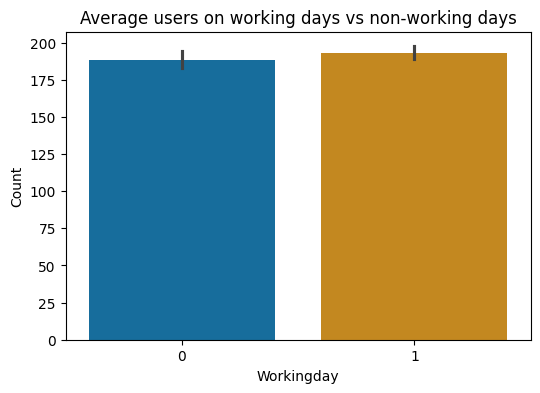

In [ ]:
# Relation between workingday and count
plt.figure(figsize=(6, 4))
sns.barplot(x='workingday', y='count', hue='workingday', data=data, palette='colorblind', legend=False)
plt.title('Average users on working days vs non-working days')
plt.xlabel('Workingday')
plt.ylabel('Count')
plt.show()

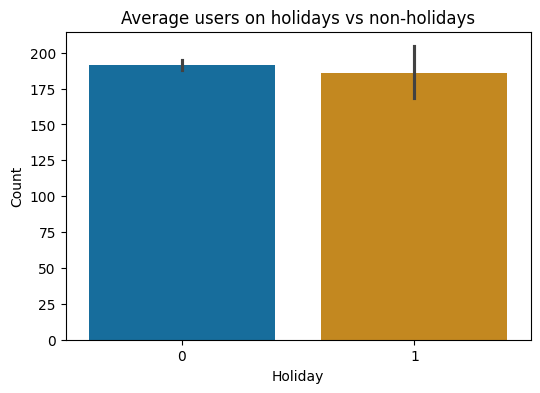

In [ ]:
#Relation between holiday and count
plt.figure(figsize=(6, 4))
sns.barplot(x='holiday', y='count', hue='holiday', data=data, palette='colorblind', legend=False)
plt.title('Average users on holidays vs non-holidays')
plt.xlabel('Holiday')
plt.ylabel('Count')
plt.show()

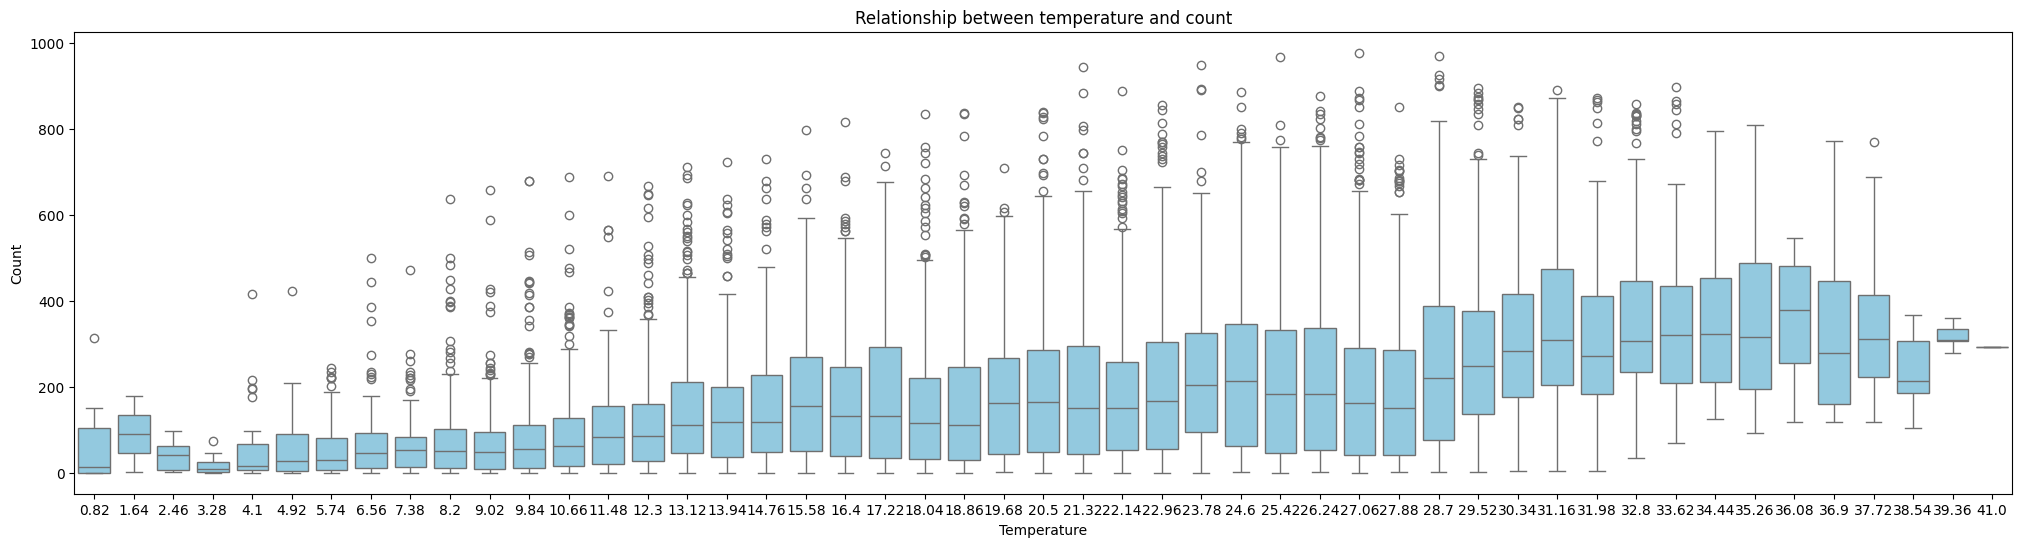

In [ ]:
#Relation between temperature and count
plt.figure(figsize=(25, 6))
sns.boxplot(x='temp', y='count', data=data, color='skyblue')
plt.title('Relationship between temperature and count')
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.show()

**Observations**
- Yulu bike usage tends to be higher on working days compared to non-working days.
- The average user count shows a seasonal trend, with the highest counts observed during spring and the lowest during autumn.
- Bike usage is most frequent during clear weather conditions and least frequent during rainy or snowy weather.
- On average, there are slightly fewer users on holidays compared to regular days.
- There is a positive correlation between temperature and user count, indicating that as the temperature increases, the average user count also tends to increase.

# **Hypothesis Testing**


## **Chi-Square-test**

Chi-Square-test :
To check if Weather is dependent on the season
* **Null Hypothesis (H0):**
The null hypothesis suggests that weather and season are independent of each other.

* **Alternative Hypothesis (H1):**
The alternative hypothesis suggests that weather and season are dependent on each other.

* We will use a significance level (alpha) of 0.05 to assess the hypotheses.

In [ ]:
from scipy.stats import chi2_contingency

weatherSeason = pd.crosstab(data['weather'], data['season'])
chi2, p, dof, expected = chi2_contingency(weatherSeason)
alpha = 0.05

print("Chi-square statistic:", chi2)
print("p-value:", p)

if p < alpha:
    print("Reject the null hypothesis. There is a significant relation between weather and season.")
else:
    print("Fail to reject the null hypothesis. There is no significant relation between weather and season.")

Chi-square statistic: 49.15865559689363
p-value: 1.5499250736864862e-07
Reject the null hypothesis. There is a significant relation between weather and season.


**Observations :**
There is a significant realtion between weather and season in the dataset.

## **ANNOVA**

To check if No. of cycles rented is similar or different in different seasons:


* **Nukk Hypothesis (H0) :**
No difference in cycle rentals across weather conditions.
* **Alternate Hypothesis(H1) :**
At least one weather condition affects cycle rentals differently.
* **alpha = 0.05**


In [ ]:
weather_ = [data[data['weather'] == i]['count'] for i in data['weather'].unique()]

f_stat, p_value = f_oneway(*weather_)

alpha = 0.05

print("F-statistic:", f_stat)
print("p-value:", p_value)

if p_value < alpha:
    print("Reject the null hypothesis: Significant difference in rental counts across at least one pair of weather conditions.")
else:
    print("Fail to reject the null hypothesis: No significant difference in rental counts across different weather conditions.")


F-statistic: 65.53024112793271
p-value: 5.482069475935669e-42
Reject the null hypothesis: Significant difference in rental counts across at least one pair of weather conditions.



**Observation:**

There is a significant difference in the average number of cycles rented across different weather conditions. This indicates that weather conditions strongly influence cycle demand, potentially leading to varying rental counts under different weather conditions.



---

**ANNOVA to check if No. of cycles rented is similar or different in different seasons:**
* **Null Hypothesis (H0):**
The null hypothesis proposes that the average number of cycles rented is the same across different weather conditions.

* **Alternative Hypothesis (H1):**
The alternative hypothesis suggests that there is a significant difference in the average number of cycles rented among at least some pairs of weather conditions.
* set the significance value (alpha) as 0.05 .

In [ ]:
#ANNOVA test
seasons = [data[data['season'] == i]['count'] for i in data['season'].unique()]

f_stat, p_value = f_oneway(*seasons)
alpha = 0.05

print("F-statistic:", f_stat)
print("p-value:", p_value)
if p_value < alpha:
    print("Reject the null hypothesis: Significant difference in rental counts across at least one pair of seasons.")
else:
    print("Fail to reject the null hypothesis: No significant difference in rental counts across different seasons.")



F-statistic: 236.94671081032106
p-value: 6.164843386499654e-149
Reject the null hypothesis: Significant difference in rental counts across at least one pair of seasons.


**Observations :**

There is indeed a difference in rental counts between at least one pair of seasons, indicating that the season influences the number of cycles rented.

## **2-Sample T-Test**


To check if Working Day has an effect on the number of electric cycles rented

* **Null Hypothesis (H0):**
The null hypothesis posits that the average number of electric cycles rented is the same between working days and non-working days.

* **Alternate Hypothesis (H1):**
The alternate hypothesis proposes that there is a difference in the average number of electric cycles rented between working days and non-working days.
- set the significance value (alpha) as 0.05 .

In [ ]:
import scipy.stats as stats  # Import the scipy.stats module for statistical functions

# Extract counts on working and non-working days
counts_wd = data[data['workingday'] == 1]['count']
counts_nwd = data[data['workingday'] == 0]['count']

#t-test using stats.ttest_ind()
t_stat, p_value = stats.ttest_ind(counts_wd, counts_nwd)
alpha = 0.05
print("t =", t_stat)
print("p =", p_value)

if p_value < alpha:
    print("Reject the null hypothesis: Significant difference in rental counts between working and non-working days.")
else:
    print("Fail to reject the null hypothesis: No significant difference in rental counts between working and non-working days.")

t = 1.2096277376026694
p = 0.22644804226361348
Fail to reject the null hypothesis: No significant difference in rental counts between working and non-working days.


**Observations :**

**2-Sample T-Test :**
The two-sample t-test compares the means of two independent groups to determine if they are significantly different from each other.

1. The calculated t-statistic is approximately 1.21.
2. The p-value associated with the t-test is approximately 0.226.
3. Since the p-value (0.226) is greater than the significance level (0.05), we fail to reject the null hypothesis.
4. Therefore, there is no statistically significant difference in the average rental counts between working days and non-working days based on this test result.

These observations summarize the outcome of the 2-sample t-test and its interpretation regarding the rental counts on working versus non-working days.

# **Conclusion**

### **Business Insights:**

1. **Consistency in Rental Demand:**
   - Yulu's shared electric cycles exhibit consistent demand across both working and non-working days, indicating a steady utilization of the service throughout the week.
   - This consistency suggests that Yulu's service is valued by users for daily commuting and leisure activities, regardless of the day of the week.
   
2. **Weather-Specific Service Enhancements:**
   - The analysis reveals a significant impact of weather conditions on rental counts, highlighting the need for weather-specific service enhancements.
   - Yulu can consider introducing weather-responsive features such as rain covers or temperature-controlled accessories to enhance rider comfort and promote usage during adverse weather conditions.
   
3. **Community Engagement and Branding:**
   - Community engagement initiatives such as organizing group rides or community events can foster brand loyalty and strengthen Yulu's presence in the local market.
   - Promoting brand visibility through targeted marketing campaigns will help raise awareness and attract new users to Yulu's micro-mobility offerings.

## **Business Recommendations:**

1. **Optimize Resource Allocation:**
   - Strategically allocate cycles in high-demand areas during peak seasons and favorable weather conditions to maximize utilization and revenue.
   
2. **Incentivize Usage:**
   - Introduce loyalty programs, discounts, or promotional offers during off-peak times to stimulate increased usage and address seasonal fluctuations in demand.
   
3. **Expand Service Areas:**
   - Explore expansion opportunities into regions with favorable weather conditions and untapped demand to broaden market reach and capture new user segments.
   
4. **Weather-Responsive Pricing:**
   - Implement dynamic pricing strategies based on weather forecasts to optimize revenue and encourage ridership during different weather conditions.
   
5. **Collaborate with Local Businesses:**
   - Foster partnerships with local businesses to offer exclusive discounts or promotions to Yulu users, creating a mutually beneficial ecosystem and driving customer engagement.
   
6. **Enhance User Experience:**
   - Continuously improve the user experience by upgrading cycle quality, integrating GPS tracking, and ensuring convenient access to charging stations.

### **Community Engagement and Branding:**

1. **Organize Community Events:**
   - Host community events, group rides, or cycling challenges to promote community engagement, build brand loyalty, and create a strong local presence.

2. **Targeted Marketing Campaigns:**
   - Implement targeted marketing campaigns to raise awareness of Yulu's offerings and establish a distinctive brand identity in the market.

3. **Collaborate with Local Organizations:**
   - Collaborate with local organizations and authorities to support sustainable transportation initiatives, promote eco-friendly practices, and build a positive brand image within the community.

These strategic recommendations and insights derived from the data analysis can help Yulu to optimize its operations, enhance customer satisfaction, and drive sustainable growth in the micro-mobility sector.